In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep
from scipy.stats import linregress
from pprint import pprint
import csv

In [2]:
# Study data files
physical_activity_path = "Physical_activity.csv"
suicide_path = "Suicide.csv"

In [3]:
# Read the data and store into Pandas DataFrame
physical_activity = pd.read_csv(physical_activity_path)

# Display the data table for preview
physical_activity.head()

,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Gender,Race/Ethnicity,StratificationCategory1
0,2020,US,National,Percent of adults who engage in no leisure-tim...,30.6,29.4,31.8,31255.0,NaN,NaN,Hispanic,Race/Ethnicity
1,2014,GU,Guam,Percent of adults aged 18 years and older who ...,29.3,25.7,33.3,842.0,NaN,NaN,NaN,Education
2,2013,US,National,Percent of adults aged 18 years and older who ...,28.8,28.1,29.5,62562.0,NaN,NaN,NaN,Income
3,2013,US,National,Percent of adults aged 18 years and older who ...,32.7,31.9,33.5,60069.0,NaN,NaN,NaN,Income
4,2015,US,National,Percent of adults who achieve at least 300 min...,26.6,25.6,27.6,30904.0,NaN,NaN,NaN,Income


In [4]:
# Read the data
suicide = pd.read_csv(suicide_path)
suicide = suicide.drop("URL", axis=1)
# Display the data table for preview
suicide.head()

,YEAR,STATE,RATE,DEATHS
0,2020,AL,16.0,793
1,2020,AK,27.5,204
2,2020,AZ,17.6,1363
3,2020,AR,19.0,583
4,2020,CA,10.0,4144


In [5]:
physical_activity = physical_activity.rename(columns={'YearEnd':'Year', 'LocationAbbr':'State'})

In [6]:
suicide = suicide.rename(columns={'YEAR':'Year', 'STATE':'State', 'RATE':'Suicide Rate'})

In [7]:
suicide_activity_df = pd.merge(suicide, physical_activity, on=["Year","State"], how="outer")
suicide
suicide_activity_df.head()

,Year,State,Suicide Rate,DEATHS,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Gender,Race/Ethnicity,StratificationCategory1
0,2020,AL,16.0,793,Alabama,Percent of adults aged 18 years and older who ...,37.7,35.0,40.4,2089.0,NaN,Male,NaN,Gender
1,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black,Race/Ethnicity
2,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN,Age (years)
3,2020,AL,16.0,793,Alabama,Percent of adults aged 18 years and older who ...,32.3,29.3,35.4,1442.0,NaN,NaN,NaN,Education
4,2020,AL,16.0,793,Alabama,Percent of adults aged 18 years and older who ...,39.6,26.2,54.6,76.0,NaN,NaN,2 or more races,Race/Ethnicity


In [8]:
suicide_activity_2020_df = suicide_activity_df.loc[suicide_activity_df['Year'] == 2020]
suicide_activity_2020_df.head

<bound method NDFrame.head of        Year State  Suicide Rate DEATHS          LocationDesc  \
0      2020    AL          16.0    793               Alabama   
1      2020    AL          16.0    793               Alabama   
2      2020    AL          16.0    793               Alabama   
3      2020    AL          16.0    793               Alabama   
4      2020    AL          16.0    793               Alabama   
...     ...   ...           ...    ...                   ...   
56956  2020    DC           NaN    NaN  District of Columbia   
56957  2020    DC           NaN    NaN  District of Columbia   
56958  2020    DC           NaN    NaN  District of Columbia   
56959  2020    DC           NaN    NaN  District of Columbia   
56960  2020    DC           NaN    NaN  District of Columbia   

                                                Question  Data_Value  \
0      Percent of adults aged 18 years and older who ...        37.7   
1      Percent of adults who engage in no leisure-tim... 

In [9]:
suicide_activity_2020_DE_df = suicide_activity_2020_df.loc[suicide_activity_2020_df['State'] == "DE"]
suicide_activity_2020_DE_df.head()

,Year,State,Suicide Rate,DEATHS,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Gender,Race/Ethnicity,StratificationCategory1
588,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,15.3,6.9,30.6,65.0,NaN,NaN,Asian,Race/Ethnicity
589,2020,DE,12.3,124,Delaware,Percent of adults aged 18 years and older who ...,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,Race/Ethnicity
590,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,17.5,11.7,25.2,276.0,18 - 24,NaN,NaN,Age (years)
591,2020,DE,12.3,124,Delaware,Percent of adults aged 18 years and older who ...,NaN,NaN,NaN,NaN,NaN,NaN,Other,Race/Ethnicity
592,2020,DE,12.3,124,Delaware,Percent of adults aged 18 years and older who ...,35.2,31.6,39.0,1189.0,65 or older,NaN,NaN,Age (years)


In [10]:
suicide_activity_2020_DE_df = suicide_activity_2020_DE_df.loc[suicide_activity_2020_DE_df['Question'] == "Percent of adults who engage in no leisure-time physical activity"]
suicide_activity_2020_DE_df.head()

,Year,State,Suicide Rate,DEATHS,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Gender,Race/Ethnicity,StratificationCategory1
588,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,15.3,6.9,30.6,65.0,NaN,NaN,Asian,Race/Ethnicity
590,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,17.5,11.7,25.2,276.0,18 - 24,NaN,NaN,Age (years)
596,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,25.0,21.1,29.3,799.0,NaN,NaN,NaN,Income
601,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,33.2,25.9,41.4,335.0,NaN,NaN,NaN,Income
603,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,21.5,19.5,23.7,2625.0,NaN,NaN,Non-Hispanic White,Race/Ethnicity


In [11]:
Value_by_gender = suicide_activity_2020_DE_df[["Data_Value","Gender"]]
Value_by_gender.head()

,Data_Value,Gender
588,15.3,NaN
590,17.5,NaN
596,25.0,NaN
601,33.2,NaN
603,21.5,NaN


In [12]:
Value_by_gender = Value_by_gender.dropna()
Value_by_gender

,Data_Value,Gender
611,22.7,Male
642,26.5,Female


In [13]:
Avg_value = Value_by_gender["Data_Value"].mean()
Avg_value

24.6

In [14]:
suicide_activity_2020_DE_df["Avg_Value"] = Avg_value
suicide_activity_2020_DE_df.head()

,Year,State,Suicide Rate,DEATHS,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Gender,Race/Ethnicity,StratificationCategory1,Avg_Value
588,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,15.3,6.9,30.6,65.0,NaN,NaN,Asian,Race/Ethnicity,24.6
590,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,17.5,11.7,25.2,276.0,18 - 24,NaN,NaN,Age (years),24.6
596,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,25.0,21.1,29.3,799.0,NaN,NaN,NaN,Income,24.6
601,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,33.2,25.9,41.4,335.0,NaN,NaN,NaN,Income,24.6
603,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,21.5,19.5,23.7,2625.0,NaN,NaN,Non-Hispanic White,Race/Ethnicity,24.6


Text(0, 0.5, 'Rate')

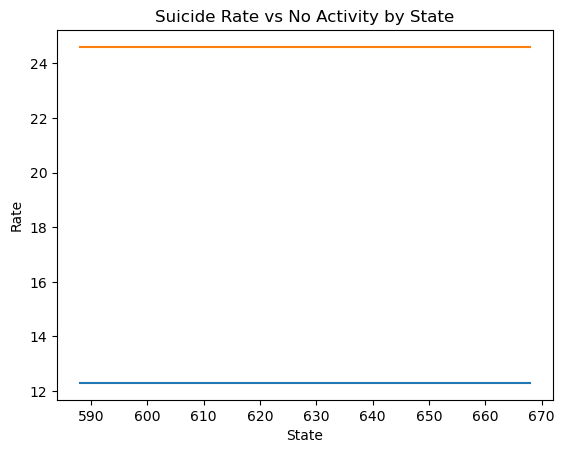

In [17]:
# Generate a line plot
suicide_activity_2020_DE_df = suicide_activity_2020_DE_df[["Suicide Rate", "Avg_Value"]]

# Line graph
suicide_activity_2020_DE_df.plot(kind='line', legend=None)
plt.xlabel("State")
plt.title("Suicide Rate vs No Activity by State")
plt.ylabel("Rate")

# # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# drug_count_s = clean_data_complete_df["Drug Regimen"].value_counts()
# bar_timepoint = drug_count_s.plot.bar(legend=None)
# bar_timepoint
# plt.xlabel("State")
# plt.ylabel("Rate")